In [ ]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *

%matplotlib inline

# Based on contour annotation

In [ ]:
windowing_settings

In [ ]:
win_id = 12
# for stack in ['MD585', 'MD594', 'MD589']:
for stack in ['MD585']:
    grid_index_class_lookup, latest_timestamp = \
    generate_annotation_to_grid_indices_lookup_v2(stack, win_id=win_id, by_human=True, 
                                                  stack_m='atlasV7',
                                                 suffix='contours', timestamp='latest',
                                                 surround_margins=[200, 500],
                                                return_timestamp=True)
    
    # Everything past here just saved results
    grid_index_class_lookup_fp = \
    DataManager.get_annotation_to_grid_indices_lookup_filepath(stack=stack, win_id=win_id, 
                                                               by_human=True, timestamp=latest_timestamp)
    print grid_index_class_lookup_fp

    save_hdf_v2(grid_index_class_lookup, grid_index_class_lookup_fp)
    upload_to_s3(grid_index_class_lookup_fp)

In [ ]:
grid_index_class_lookup_fp

In [6]:
grid_index_class_lookup['10N'][179]

array([32489, 32655, 32656, 32821, 32822, 32988, 32989, 33154, 33155,
       33156, 33321, 33322, 33323, 33487, 33488, 33489, 33654, 33655,
       33656, 33820, 33821, 33822, 33987, 33988, 33989, 34154, 34155,
       34321, 34322, 34487, 34488])

In [5]:
grid_index_class_lookup

10N 10N_negative 10N_surround_200um_12N 10N_surround_200um_AP  \
83   NaN          NaN                    NaN                   NaN   
84   NaN          NaN                    NaN                   NaN   
85   NaN          NaN                    NaN                   NaN   
86   NaN          NaN                    NaN                   NaN   
87   NaN          NaN                    NaN                   NaN   
88   NaN          NaN                    NaN                   NaN   
89   NaN          NaN                    NaN                   NaN   
90   NaN          NaN                    NaN                   NaN   
91   NaN          NaN                    NaN                   NaN   
92   NaN          NaN                    NaN                   NaN   
93   NaN          NaN                    NaN                   NaN   
94   NaN          NaN                    NaN                   NaN   
95   NaN          NaN                    NaN                   NaN   
96   NaN          NaN                    NaN                   NaN   
97   NaN          NaN                    NaN                   NaN   
98   NaN          NaN                    NaN                   NaN   
99   NaN          NaN                    NaN                   NaN   
100  NaN          NaN                    NaN                   NaN   
101  NaN          NaN                    NaN                   NaN   
102  NaN          NaN                    NaN                   NaN   
103  NaN          NaN                    NaN                   NaN   
104  NaN          NaN                    NaN                   NaN   
105  NaN          NaN                    NaN                   NaN   
106  NaN          NaN                    NaN                   NaN   
107  NaN          NaN                    NaN                   NaN   
108  NaN          NaN                    NaN                   NaN   
109  NaN          NaN                    NaN                   NaN   
110  NaN          NaN                    NaN                   NaN   
111  NaN          NaN                    NaN                   NaN   
112  NaN          NaN                    NaN                   NaN   
..   ...          ...                    ...                   ...   
323  NaN          NaN                    NaN                   NaN   
324  NaN          NaN                    NaN                   NaN   
325  NaN          NaN                    NaN                   NaN   
326  NaN          NaN                    NaN                   NaN   
327  NaN          NaN                    NaN                   NaN   
328  NaN          NaN                    NaN                   NaN   
329  NaN          NaN                    NaN                   NaN   
330  NaN          NaN                    NaN                   NaN   
331  NaN          NaN                    NaN                   NaN   
332  NaN          NaN                    NaN                   NaN   
333  NaN          NaN                    NaN                   NaN   
334  NaN          NaN                    NaN                   NaN   
335  NaN          NaN                    NaN                   NaN   
336  NaN          NaN                    NaN                   NaN   
337  NaN          NaN                    NaN                   NaN   
338  NaN          NaN                    NaN                   NaN   
339  NaN          NaN                    NaN                   NaN   
340  NaN          NaN                    NaN                   NaN   
341  NaN          NaN                    NaN                   NaN   
342  NaN          NaN                    NaN                   NaN   
343  NaN          NaN                    NaN                   NaN   
344  NaN          NaN                    NaN                   NaN   
345  NaN          NaN                    NaN                   NaN   
346  NaN          NaN                    NaN                   NaN   
347  NaN          NaN                    NaN                   NaN   
348  NaN       

In [ ]:
# win_id = 3
# windowing_properties = windowing_settings[win_id]
# patch_size = windowing_properties['patch_size']
# spacing = windowing_properties['spacing']
# w, h = metadata_cache['image_shape'][stack]
# half_size = patch_size/2
# grid_spec = (patch_size, spacing, w, h)

# Based on aligned atlas

In [2]:
positive_level = {}
for name_u in all_known_structures:
    if name_u == '4N':
        positive_level[name_u] = 0.6
    elif name_u == '10N':
        positive_level[name_u] = 0.7
    else:
        positive_level[name_u] = 0.8
        
# positive_level = 0.8

In [3]:
from learning_utilities import *

In [ ]:
# stack = 'ChatCryoJane201710'
for stack in [
 'MD652',
 'MD653',
 'MD657',
'MD658']:
    win_id = 5
    detector_id = 13
    grid_index_class_lookup = generate_annotation_to_grid_indices_lookup(stack=stack, win_id=win_id, by_human=False, 
                                                                                    detector_id_f=detector_id,
                                                                        surround_margins=[200],
                                                                        positive_level=0.8, negative_level=0.1)
    grid_index_class_lookup_fp = \
DataManager.get_annotation_to_grid_indices_lookup_filepath(stack=stack, win_id=win_id, by_human=False, 
                                                                     stack_m='atlasV5', 
                                                                                detector_id_f=detector_id,
                                                          timestamp='now')
    save_hdf_v2(grid_index_class_lookup, grid_index_class_lookup_fp)
    upload_to_s3(grid_index_class_lookup_fp)

In [ ]:
# stack = 'ChatCryoJane201710'
for stack in [
 'MD661',
 'MD662']:
    win_id = 7
    detector_id = 1
    grid_index_class_lookup = generate_annotation_to_grid_indices_lookup(stack=stack, win_id=win_id, by_human=False, 
                                                                                    detector_id_f=detector_id,
                                                                        surround_margins=[200],
                                                                        positive_level=positive_level, 
                                                                         negative_level=0.1)
    grid_index_class_lookup_fp = \
DataManager.get_annotation_to_grid_indices_lookup_filepath(stack=stack, win_id=win_id, by_human=False, 
                                                                     stack_m='atlasV5', 
                                                                                detector_id_f=detector_id,
                                                          timestamp='now')
    save_hdf_v2(grid_index_class_lookup, grid_index_class_lookup_fp)
    upload_to_s3(grid_index_class_lookup_fp)

# Use human-corrected structure annotation file

In [4]:
def generate_annotation_to_grid_indices_lookup_v2(stack, by_human, win_id,
                                               stack_m='atlasV5',
                                               detector_id_m=None,
                                                detector_id_f=None,
                                                warp_setting=17, trial_idx=None,
                                              surround_margins_um=None, suffix='contours', 
                                                  timestamp='latest', prep_id='alignedBrainstemCrop',
                                                positive_level=0.8, negative_level=0.2,
                                              return_timestamp=False,
                                                  sections=None,
                                              structures=None):
    
    structures_df = DataManager.load_annotation_v4(stack=stack, by_human=by_human, 
                                                   suffix=suffix, 
                                                   timestamp=timestamp)

    warped_volumes, warped_volumes_resolution = \
    convert_structure_annotation_to_volume_origin_dict_v2(structures_df=structures_df, 
                                                          out_resolution='10.0um', stack=stack)
    
    sample_every = 5
    
    structure_contours_wrt_alignedBrainstemCrop_rawResol_pos_level = \
    get_structure_contours_from_structure_volumes_v2(warped_volumes, stack=stack,
                                                     sections=metadata_cache['valid_sections'][stack] if sections is None else sections,
                                                     resolution=warped_volumes_resolution,
                                                     level=positive_level,
                                                     sample_every=sample_every, 
                                                     use_unsided_name_as_key=True)

    structure_contours_wrt_alignedBrainstemCrop_rawResol_neg_level = \
    get_structure_contours_from_structure_volumes_v2(warped_volumes, stack=stack,
                                                     sections=metadata_cache['valid_sections'][stack] if sections is None else sections,
                                                     resolution=warped_volumes_resolution,
                                                     level=negative_level,
                                                     sample_every=sample_every, 
                                                      use_unsided_name_as_key=True)
    
    grid_spec = win_id_to_gridspec(win_id=win_id, stack=stack)
    
    patch_indices_allSections_allStructures = {}

    sections = \
    sorted(list(set(structure_contours_wrt_alignedBrainstemCrop_rawResol_pos_level.keys()) | \
    set(structure_contours_wrt_alignedBrainstemCrop_rawResol_neg_level.keys())))

    for sec in sections:

        sys.stderr.write('Computing grid indices lookup for section %d...\n' % sec)

        mask_tb = DataManager.load_thumbnail_mask_v3(stack=stack, section=sec, prep_id=prep_id)

        patch_indices_thisSection_allStructures = {}

        if sec in structure_contours_wrt_alignedBrainstemCrop_rawResol_pos_level:

            patch_indices_thisSection_allStructures.update(
            locate_patches_v2(grid_spec=grid_spec, 
                              mask_tb=mask_tb,
                              polygons=structure_contours_wrt_alignedBrainstemCrop_rawResol_pos_level[sec].items(), \
                              surround_margins=surround_margins_um, 
                              categories=['positive']))

        if sec in structure_contours_wrt_alignedBrainstemCrop_rawResol_neg_level:

            patch_indices_thisSection_allStructures.update(
            locate_patches_v2(grid_spec=grid_spec, 
                              mask_tb=mask_tb,
                              polygons=structure_contours_wrt_alignedBrainstemCrop_rawResol_neg_level[sec].items(), \
                              surround_margins=surround_margins_um, 
                              categories=['surround']))

        if len(patch_indices_thisSection_allStructures) > 0:
            patch_indices_allSections_allStructures[sec] = patch_indices_thisSection_allStructures
            
    if return_timestamp:
        return DataFrame(patch_indices_allSections_allStructures).T, timestamp
    else:
        return DataFrame(patch_indices_allSections_allStructures).T

In [5]:
def get_structure_contours_from_structure_volumes_v2(volumes, stack, sections, 
                                                     resolution, level, sample_every=1,
                                                    use_unsided_name_as_key=False):
    """
    Re-section atlas volumes and obtain structure contours on each section.
    Resolution of output contours are in volume resolution.

    Args:
        volumes (dict of (3D array, 3-tuple)): {structure: (volume, origin_wrt_wholebrain)}. volume is a 3d array of probability values.
        sections (list of int):
        resolution (int): resolution of input volumes.
        level (float or dict): the cut-off probability at which surfaces are generated from probabilistic volumes. Default is 0.5.
        sample_every (int): how sparse to sample contour vertices.

    Returns:
        Dict {section: {name_s: contour vertices}}.
    """

    from collections import defaultdict
    
    structure_contours_wrt_alignedBrainstemCrop_rawResol = defaultdict(dict)

    converter = CoordinatesConverter(stack=stack, section_list=metadata_cache['sections_to_filenames'][stack].keys())

    converter.register_new_resolution('structure_volume', resol_um=convert_resolution_string_to_um(resolution=resolution, stack=stack))
    converter.register_new_resolution('image', resol_um=convert_resolution_string_to_um(resolution='raw', stack=stack))
    
    for name_s, (structure_volume_volResol, origin_wrt_wholebrain_volResol) in volumes.iteritems():

        converter.derive_three_view_frames(name_s, 
        origin_wrt_wholebrain_um=convert_resolution_string_to_um(resolution=resolution, stack=stack) * origin_wrt_wholebrain_volResol,
        zdim_um=convert_resolution_string_to_um(resolution=resolution, stack=stack) * structure_volume_volResol.shape[2])

        positions_of_all_sections_wrt_structureVolume = converter.convert_frame_and_resolution(
        p=np.array(sections)[:,None],
        in_wrt=('wholebrain', 'sagittal'), in_resolution='section',
        out_wrt=(name_s, 'sagittal'), out_resolution='structure_volume')[..., 2].flatten()
            
        structure_ddim = structure_volume_volResol.shape[2]
        
        valid_mask = (positions_of_all_sections_wrt_structureVolume >= 0) & (positions_of_all_sections_wrt_structureVolume < structure_ddim)
        if np.count_nonzero(valid_mask) == 0:
#             sys.stderr.write("%s, valid_mask is empty.\n" % name_s)
            continue

        positions_of_all_sections_wrt_structureVolume = positions_of_all_sections_wrt_structureVolume[valid_mask]
        positions_of_all_sections_wrt_structureVolume = np.round(positions_of_all_sections_wrt_structureVolume).astype(np.int)
        
        if isinstance(level, dict):
            level_this_structure = level[name_s]
        elif isinstance(level, float):
            level_this_structure = level
        else:
            raise

        contour_2d_wrt_structureVolume_sectionPositions_volResol = \
        find_contour_points_3d(structure_volume_volResol >= level_this_structure,
                                along_direction='sagittal',
                                sample_every=sample_every,
                                positions=positions_of_all_sections_wrt_structureVolume)
                        
        for d_wrt_structureVolume, cnt_uv_wrt_structureVolume in contour_2d_wrt_structureVolume_sectionPositions_volResol.iteritems():
            
            contour_3d_wrt_structureVolume_volResol = np.column_stack([cnt_uv_wrt_structureVolume, np.ones((len(cnt_uv_wrt_structureVolume),)) * d_wrt_structureVolume])
            
#             contour_3d_wrt_wholebrain_uv_rawResol_section = converter.convert_frame_and_resolution(
#                 p=contour_3d_wrt_structureVolume_volResol,
#                 in_wrt=(name_s, 'sagittal'), in_resolution='structure_volume',
#                 out_wrt=('wholebrain', 'sagittal'), out_resolution='image_image_section')

            contour_3d_wrt_alignedBrainstemCrop_uv_rawResol_section = converter.convert_frame_and_resolution(
                p=contour_3d_wrt_structureVolume_volResol,
                in_wrt=(name_s, 'sagittal'), in_resolution='structure_volume',
                out_wrt=('wholebrainXYcropped', 'sagittal'), out_resolution='image_image_section')
            
            assert len(np.unique(contour_3d_wrt_alignedBrainstemCrop_uv_rawResol_section[:,2])) == 1
            sec = int(contour_3d_wrt_alignedBrainstemCrop_uv_rawResol_section[0,2])
        
            if use_unsided_name_as_key:
                name = convert_to_unsided_label(name_s)
            else:
                name = name_s
            structure_contours_wrt_alignedBrainstemCrop_rawResol[sec][name] = contour_3d_wrt_alignedBrainstemCrop_uv_rawResol_section[..., :2]

    return structure_contours_wrt_alignedBrainstemCrop_rawResol

In [6]:
positive_level = {}
for name_s in all_known_structures_sided:
    name_u = convert_to_unsided_label(name_s)
    if name_u == '4N':
        positive_level[name_s] = 0.6
    elif name_u == '10N':
        positive_level[name_s] = 0.7
    else:
        positive_level[name_s] = 0.8

# positive_level = 0.8

negative_level = .1

In [7]:
win_id = 7

In [8]:
for stack in ['CHATM2']:
    
    timestamp = '05102018101342' # CHATM2
#     timestamp = '04272018015834' # CHATM3
    
    grid_index_class_lookup = \
    generate_annotation_to_grid_indices_lookup_v2(stack=stack, win_id=win_id, 
                                                by_human=True, 
                                            surround_margins_um=[200, 500],
                                            positive_level=positive_level, 
                                             negative_level=negative_level,
                                            suffix='structures',
                                               timestamp=timestamp,
                                               sections=metadata_cache['valid_sections'][stack])
    grid_index_class_lookup_fp = \
DataManager.get_annotation_to_grid_indices_lookup_filepath(stack=stack, win_id=win_id, by_human=True, 
                                                           timestamp=timestamp,
                                                          suffix='structures')
    save_data(grid_index_class_lookup, grid_index_class_lookup_fp, upload_s3=False)

3 contours of reconstructed volume is found at position 87 ([44, 3, 1]). Use the longest one.
3 contours of reconstructed volume is found at position 91 ([68, 2, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 95 ([65, 2]). Use the longest one.
7 contours of reconstructed volume is found at position 115 ([13, 5, 2, 1, 1, 1, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 9 ([23, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 17 ([54, 1]). Use the longest one.
3 contours of reconstructed volume is found at position 29 ([69, 2, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 31 ([74, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 39 ([67, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 47 ([53, 1]). Use the longest one.
2 contours of reconstructed volume is found at position 11 ([8, 1]

Computing grid indices lookup for section 73...
Computing grid indices lookup for section 74...
Computing grid indices lookup for section 75...
Computing grid indices lookup for section 76...
Computing grid indices lookup for section 77...
Computing grid indices lookup for section 78...
Computing grid indices lookup for section 79...
Computing grid indices lookup for section 80...
Computing grid indices lookup for section 81...
Computing grid indices lookup for section 82...
Multiple polygons for PBG (margin 500 um): [64, 4, 4]. Use the longest.
Computing grid indices lookup for section 83...
Multiple polygons for Sp5C (margin 500 um): [67, 4, 4]. Use the longest.
Computing grid indices lookup for section 84...
Computing grid indices lookup for section 85...
Computing grid indices lookup for section 86...
Computing grid indices lookup for section 87...
Computing grid indices lookup for section 88...
Computing grid indices lookup for section 89...
Computing grid indices lookup for secti

Computing grid indices lookup for section 293...
Computing grid indices lookup for section 295...
Computing grid indices lookup for section 297...
Computing grid indices lookup for section 299...
Computing grid indices lookup for section 301...
Computing grid indices lookup for section 303...
Computing grid indices lookup for section 305...
Computing grid indices lookup for section 307...
Computing grid indices lookup for section 309...
Computing grid indices lookup for section 311...
Computing grid indices lookup for section 313...
/usr/local/lib/python2.7/dist-packages/pandas/core/generic.py:939: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['10N', '10N_surround_200um_12N', '10N_surround_200um_noclass', '10N_surround_500um_12N', '10N_surround_500um_AP', '10N_surround_500um_noclass', '12N', '12N_surround_200um_10N', '12N_surround_200um_noclass', '12N_surrou

# Examine

In [30]:
# stack = 'CHATM2'
stack = 'DEMO998'
win_id = 8

In [31]:
all_locs = grid_parameters_to_sample_locations(win_id=win_id, stack=stack)

In [32]:
# timestamp = '05102018101342'
timestamp = latest_timestamp

In [33]:
# grid_index_class_lookup = \
# DataManager.load_annotation_to_grid_indices_lookup(stack=stack, win_id=win_id, by_human=True, 
#                                                    timestamp=timestamp, suffix='structures')


grid_index_class_lookup, latest_timestamp = \
generate_annotation_to_grid_indices_lookup_v2(stack, win_id=win_id, by_human=True, 
                                              stack_m='atlasV7',
                                             suffix='contours', timestamp='latest',
                                             surround_margins=[200, 500],
                                            return_timestamp=True)

latest timestamp:  09252018000007


ENABLE_DOWNLOAD_S3 is False. Skip downloading from S3.
ENABLE_DOWNLOAD_S3 is False. Skip downloading from S3.
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
Seems you are using operation INIs to provide cropbox.
ENABLE_DOWNLOAD_S3 is False. Skip downloading from S3.
Computing grid indices lookup for section 225...
Trying to load /home/yuncong/MouseBrainAtlas/demo/demo_data/CSHL_data_processed/DEMO998/DEMO998_prep2_thumbnail_mask/MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242_prep2_thumbnail_mask.png
File not on local disk. Download from S3.
cv2.imread fails to load. Try skimage.imread.
skimage.imread fails to load.
Image fails to load. Trying to convert from other resol/versions.
Resolution thumbnail is not available. Instead, try loading raw and then downscale...
Trying to load /home/yuncong/MouseBrainAtlas/demo/demo_data/CSHL_data_processed/DEMO998/DEMO998_prep2_raw_mask/MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242_prep2_r

In [26]:
sec = 225

In [27]:
# img = DataManager.load_image_v2(stack=stack, section=sec, prep_id=2, version='gray')
img = DataManager.load_image_v2(stack=stack, section=sec, prep_id='alignedBrainstemCrop', 
                                version='NtbNormalizedAdaptiveInvertedGamma')

Trying to load /home/yuncong/MouseBrainAtlas/demo/demo_data/CSHL_data_processed/DEMO998/DEMO998_prep2_raw_NtbNormalizedAdaptiveInvertedGamma/MD662&661-F81-2017.06.06-12.44.40_MD661_2_0242_prep2_raw_NtbNormalizedAdaptiveInvertedGamma.tif


In [28]:
viz = gray2rgb(img)

for label, grids in grid_index_class_lookup.loc[sec].dropna().iteritems():
    if parse_label(label)[2] == '500um' or 'negative' in label:
        continue
        
    for x, y in all_locs[grid_index_class_lookup[label][sec]]:
        cv2.circle(viz, (x, y), 10, name_unsided_to_color[convert_to_original_name(label)], 20)

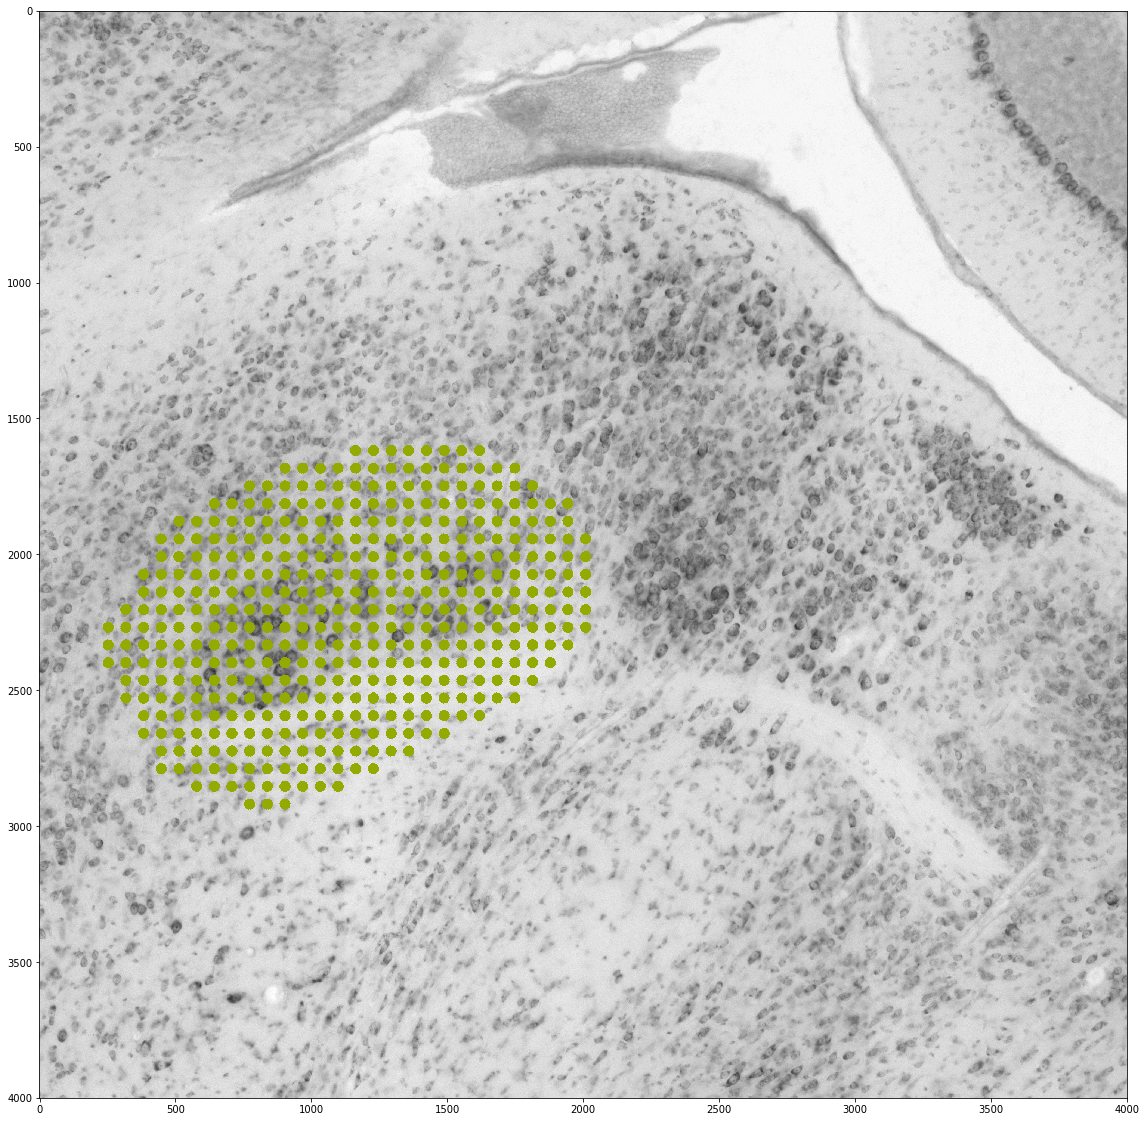

In [14]:
plt.figure(figsize=(20, 20));
plt.imshow(viz[1000*4:2000*4, 1000*4:2000*4]);

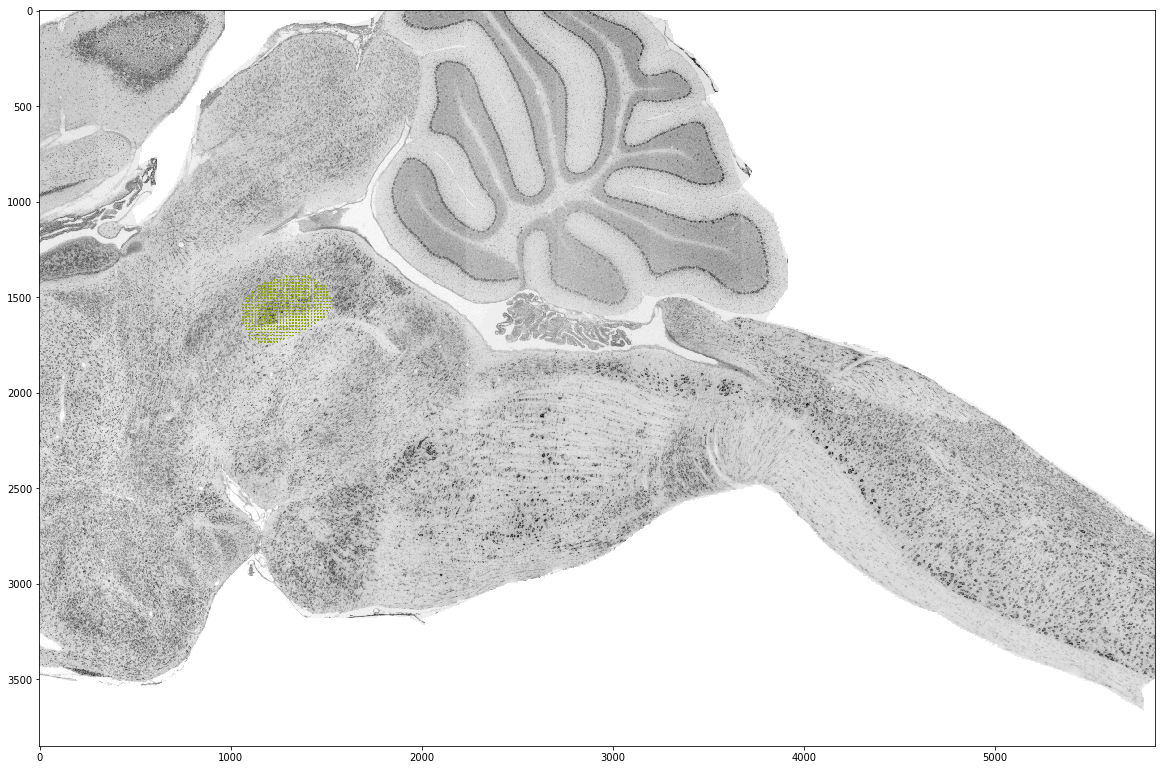

In [45]:
plt.figure(figsize=(20,20));
plt.imshow(viz[::4, ::4]);

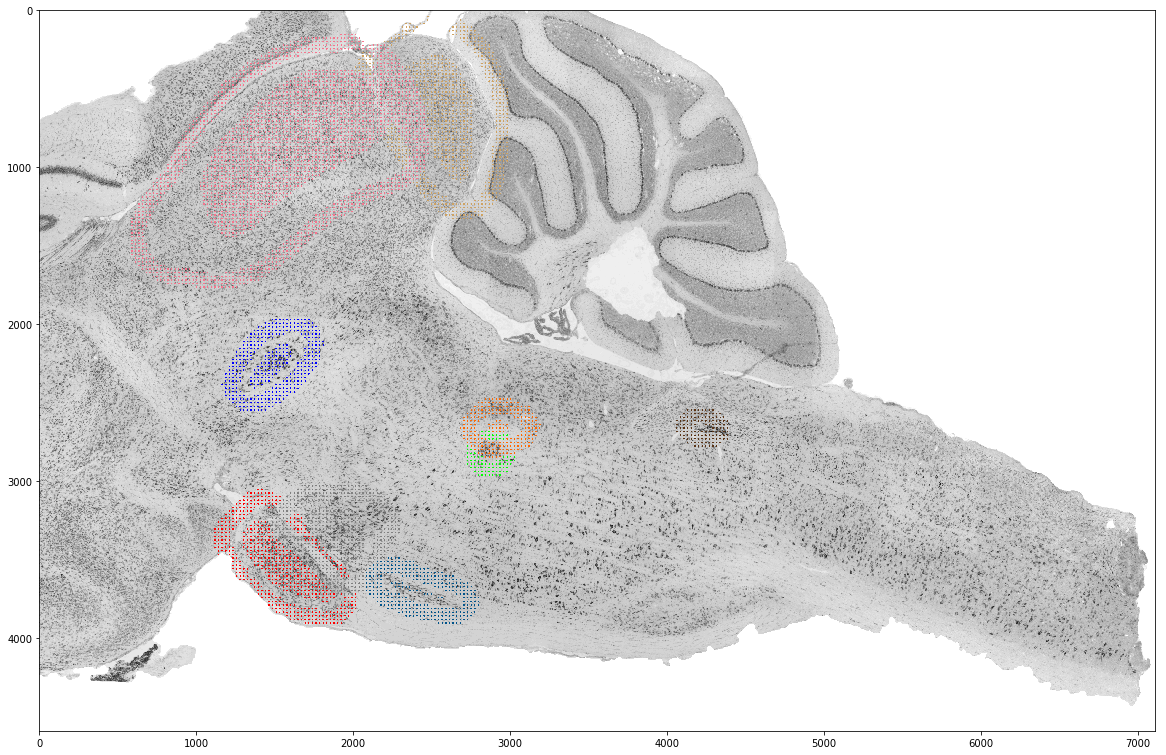

In [32]:
plt.figure(figsize=(20,20));
plt.imshow(viz[::4, ::4]);

In [32]:
viz = gray2rgb(img)

# for s in ['VCA', 'VCP']:
for s in ['7N', convert_to_surround_name(name='7N', margin='200um', suffix='noclass')]:
    all_locs = grid_parameters_to_sample_locations(win_id=win_id, stack=stack)
    if not sec in grid_index_class_lookup[s].dropna():
        sys.stderr.write("No %s patches on section %d.\n" % (s, sec))
        continue
        
    for x, y in all_locs[grid_index_class_lookup[s][sec]]:
        cv2.circle(viz, (x, y), 10, (255,0,0), 5)

In [34]:
display_image(viz[::4, ::4])

/home/yuncong/Brain/learning/tmp.jpg

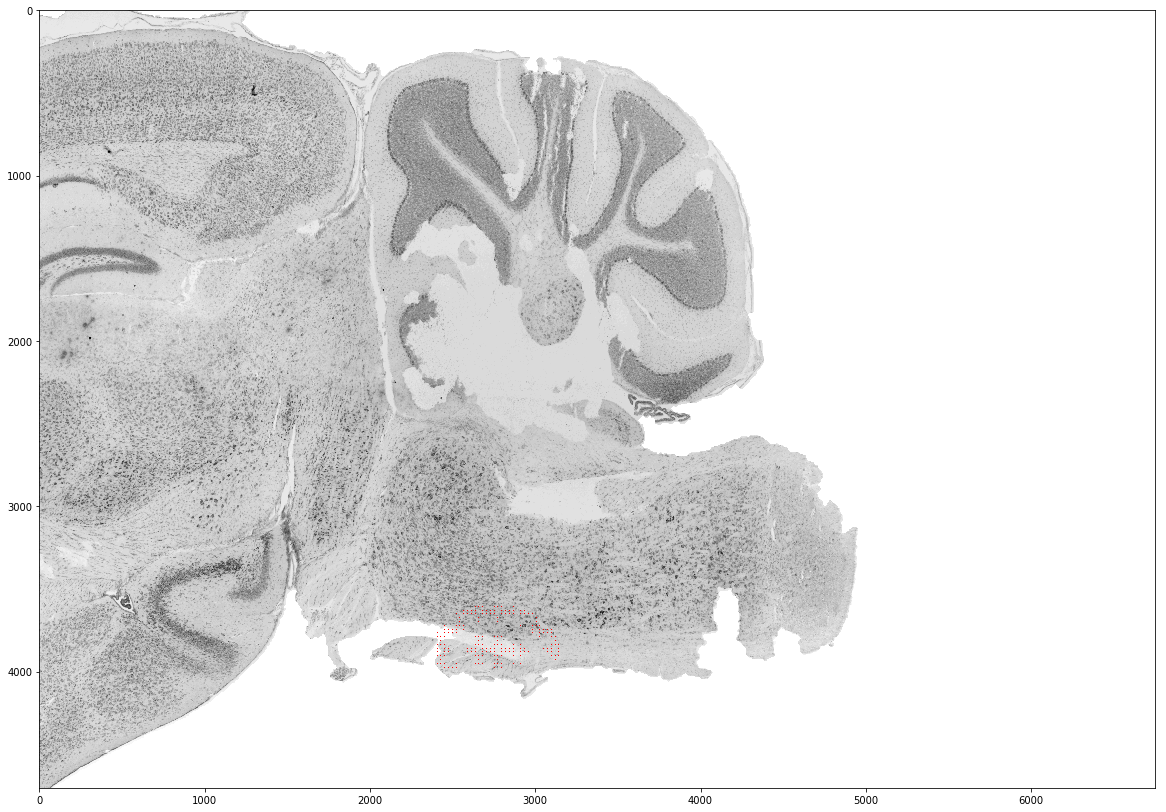

In [33]:
plt.figure(figsize=(20,20));
plt.imshow(viz[::4, ::4]);

# Save and Upload

In [9]:
# If is human created
grid_index_class_lookup_fp = \
DataManager.get_annotation_to_grid_indices_lookup_filepath(stack=stack, win_id=win_id, 
                                                           by_human=True, timestamp=latest_timestamp)
print grid_index_class_lookup_fp

/home/yuncong/MouseBrainAtlas/demo/demo_data/CSHL_labelings_v3/DEMO998/DEMO998_annotation_win12_09252018000007_grid_indices_lookup.hdf


In [ ]:
# If derived by manipulating atlas
grid_index_class_lookup_fp = \
DataManager.get_annotation_to_grid_indices_lookup_filepath(stack=stack, win_id=win_id, by_human=False, 
                                                                     stack_m='atlasV5', 
                                                                                detector_id_f=detector_id,
                                                          timestamp='now')

In [10]:
save_hdf_v2(grid_index_class_lookup, grid_index_class_lookup_fp)
# upload_to_s3(grid_index_class_lookup_fp)

In [ ]:
stack = 'MD595'

In [ ]:
grid_index_class_lookup = \
DataManager.load_annotation_to_grid_indices_lookup(stack=stack, win_id=win_id, by_human=False, 
                                                                     stack_m=atlas_name, 
                                                                                detector_id_f=detector_id,
                                                           prep_id_f=2,
                                                                                warp_setting=warp_setting,
                                                          timestamp='latest')

In [ ]:
grid_index_class_lookup = DataManager.load_annotation_to_grid_indices_lookup(stack='MD589', win_id=5, 
                                                                             by_human=True,
                                                                            timestamp='latest')

In [ ]:
grid_index_class_lookup.loc[108]['VCA']

In [ ]:
# for stack in all_annotated_stacks:
    
#     sys.stderr.write('%s\n' % stack)
    
#     label_gridIndices = locate_annotated_patches_v2(stack=stack)
    
#     annotation_grid_indices_fn = os.path.join(ANNOTATION_ROOTDIR, stack, '%(stack)s_annotation_grid_indices.h5' % dict(stack=stack))
#     label_gridIndices.to_hdf(annotation_grid_indices_fn, 'grid_indices')

In [ ]:
# label_gridIndices = read_hdf(annotation_grid_indices_fn, 'grid_indices')